# Overlap in Lexical and Literary Vocabulary

Comparing the vocabulary of Old Babylonian lexical texts (from Nippur) and the vocabulary of the Sumerian literary corpus as represented in [ETCSL](http://etcsl.orinst.ox.ac.uk/).

## Preparation 
In order to run this notebook, parse the [DCCLT](http://oracc.org/dcclt) data with the Extended ORACC Parser (2.3.3) and the [ETCSL](http://etcsl.orinst.ox.ac.uk) data with the ETCSL Parser (2.4).

In [1]:
%matplotlib inline
import pandas as pd
import os
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

# Read ETCSL Data Files
Open the file `parsed.csv`which contains all the [ETCSL](http://etcsl.orinst.ox.ac.uk) and read the data into a `Pandas`DataFrame. Each row is a word from [ETCSL](http://etcsl.orinst.ox.ac.uk/) in lemmatized format, according to [ePSD2](http://build-oracc.museum.upenn.edu/epsd2) standards.

In [2]:
file = "../2_4_Data_Acquisition_ETCSL/Output/alltexts.csv"
etcsl = pd.read_csv(file, keep_default_na=False)
etcsl = etcsl.loc[etcsl["lang"].str.contains("sux")]  # throw out non-Sumerian words

## Lemmas
Create a lemmas column and lowercase all lemmas.

In [3]:
etcsl["lemma"] = etcsl.apply(lambda r: (r["cf"] + '[' + r["gw"] + ']' + r["pos"]) 
                            if r["cf"] != '' else r['form'] + '[NA]NA', axis=1)
etcsl['lemma'] = [lemma if not lemma == '[NA]NA' else '' for lemma in etcsl['lemma'] ] 
# kick out empty forms
etcsl["lemma"] = etcsl["lemma"].str.lower()

In [5]:
etcsl = etcsl[etcsl["lemma"]!=""]  # remove lines that have no content

# Read Lexical Data

Essentially following the same process as in the preceding cell.

In [6]:
file = "../2_3_Data_Acquisition_ORACC/output/parsed.csv"
lexical = pd.read_csv(file, keep_default_na=False)
lexical

,base,cf,cont,delim,epos,extent,form,gdl,gw,id_text,...,label,lang,morph,norm,norm0,pos,scope,sense,state,id_line
0,,,,,,,kuš,"[{'v': 'kuš', 'hc': '1', 'ho': '1', 'id': 'P23...",,dcclt/P231172,...,o ii 1,sux,,,,,,,,4
1,,,,,,,x,"[{'breakStart': '1', 'o': ']', 'id': 'P231172....",,dcclt/P231172,...,o ii 1,sux,,,,,,,,4
2,,,,,,,kuš,"[{'v': 'kuš', 'id': 'P231172.5.1.0'}]",,dcclt/P231172,...,o ii 2,sux,,,,,,,,5
3,,,,,,,x,"[{'breakStart': '1', 'o': ']', 'id': 'P231172....",,dcclt/P231172,...,o ii 2,sux,,,,,,,,5
4,,,,,,,kuš,"[{'v': 'kuš', 'id': 'P231172.6.1.0'}]",,dcclt/P231172,...,o ii 3,sux,,,,,,,,6
5,,,,,,,x,"[{'breakStart': '1', 'o': ']', 'id': 'P231172....",,dcclt/P231172,...,o ii 3,sux,,,,,,,,6
6,,,,,,,kuš,"[{'v': 'kuš', 'id': 'P231172.7.1.0'}]",,dcclt/P231172,...,o ii 4,sux,,,,,,,,7
7,,,,,,,x,"[{'breakStart': '1', 'o': ']', 'id': 'P231172....",,dcclt/P231172,...,o ii 4,sux,,,,,,,,7
8,,,,,,,kuš,"[{'v': 'kuš', 'id': 'P231172.8.1.0'}]",,dcclt/P231172,...,o ii 5,sux,,,,,,,,8
9,,,,,,,x,"[{'breakStart': '1', 'o': ']', 'id': 'P231172....",,dcclt/P231172,...,o ii 5,sux,,,,,,,,8


In [7]:
lexical["lemma"] = lexical.apply(lambda r: (r["cf"] + '[' + r["gw"] + ']' + r["pos"]) 
                            if r["cf"] != '' else r['form'] + '[NA]NA', axis=1)
lexical['lemma'] = [lemma if not lemma == '[NA]NA' else '' for lemma in lexical['lemma'] ] 
# kick out empty forms
lexical["lemma"] = lexical["lemma"].str.lower()

# Select Lexical Compositions
Select the following compositions: 
* Ura 1 dcclt/Q000039
* Ura 2 dcclt/Q000040
* Ura 3 dcclt/Q000001
* Ura 4 dcclt/Q000041
* Ura 5 dcclt/Q000042
* Ura 6 dcclt/Q000043
* Lu₂-Azlag₂ B/C Q000302 
* Ugumu dcclt/Q00268
* Diri dcclt/Q000057
* Nigga dcclt/Q000052
* Izi dcclt/Q000050
* Kagal dcclt/Q000048
* Lu dcclt/Q000047

Lowercase all lemmas.

In [8]:
keep = ["dcclt/Q000039", 
    "dcclt/Q000040",
    "dcclt/Q000001",
    "dcclt/Q000041",
    "dcclt/Q000042",
    "dcclt/Q000043",
    "dcclt/Q000302 ",
    "dcclt/Q00268",
    "dcclt/Q000057",
    "dcclt/Q000052",
    "dcclt/Q000050",
    "dcclt/Q000048",
    "dcclt/Q000047"]
lexical = lexical.loc[lexical["id_text"].isin(keep)]

In [9]:
lexical = lexical[lexical["lemma"]!=""] # remove lines without content.

In [10]:
#lexical['id_line'] = [int(wordid.split('.')[1]) for wordid in lexical['id_word']]

# First Approximation
Extract the vocabulary of ETCSL and the lexical texts. Count each word separately. Thus, in the lexical item `gud an-na` we count the words `gud` (ox) and `an` (heaven) separately to see if those words appear in the literary corpus as well. This approach, therefore, does not take account of attestations of `gud an-na` in both corpora.

In [12]:
etcsl_words = ' '.join(list(etcsl["lemma"]))
lexical_words = ' '.join(list(lexical["lemma"]))
etcsl_words_l = etcsl_words.split()
lexical_words_l = lexical_words.split()
etcsl_words_l = [word for word in etcsl_words_l if not "[na]na" in word] # kick out unlemmatized words
lexical_words_l = [word for word in lexical_words_l if not "[na]na" in word]
etcsl_words_s = set(etcsl_words_l)
lexical_words_s = set(lexical_words_l)

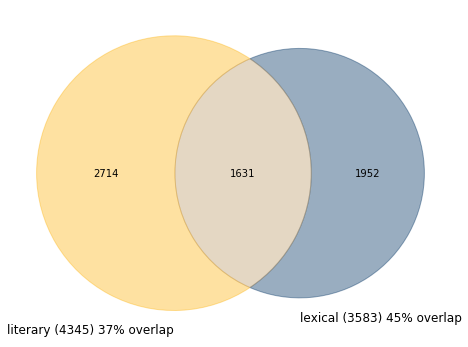

In [13]:
plt.figure(figsize=(8,8))
lit_abs = len(etcsl_words_s)
lex_abs = len(lexical_words_s)
inter_abs = len(etcsl_words_s.intersection(lexical_words_s))
lit_per = int(inter_abs/lit_abs * 100)
lex_per = int(inter_abs/lex_abs * 100)
lit_legend = "literary (" + str(lit_abs) + ') ' + str(lit_per) + "% overlap"
lex_legend = "lexical (" + str(lex_abs) + ') ' + str(lex_per) + "% overlap"
c = venn2([etcsl_words_s, lexical_words_s], (lit_legend, lex_legend))
c.get_patch_by_id('10').set_color("#fdb515")
c.get_patch_by_id('01').set_color("#003262")
c.get_patch_by_id('11').set_color("#bc9b6a")
plt.show()

# Mark Multiple Word Expressions

Iterate through the list of lexical vocabulary (beginning with the longest items) and check to see if the item contains multiple lemmatizations (contains spaces). If so, the item is an `expression` and the spaces are replaced by `*`. This will ensure that the expressions are dealt with as single units, for instance `gud an-na` (Bull of Heaven), lemmatized as `gud[bull]n an[heaven]n` becomes the unit `gud[bull]n*an[heaven]n`.

The method `.str.replace()` in `Pandas` uses regular expressions - a setting that cannot be switched off. It is necessary, therefore, to indicate that certain characters are to be read literally and not as regex special characters. This is true, in particular, for the characters `[` and `]` that surround the Guide Word (as in `gud[bull]n`). These characters, therefore, are preceded by the `escape character` `\` in the search/replace function.

The constituent words (lemmatizations) of all expressions are now connected by `*` both in the `etcsl` dataframe and in the `lex_vocab` list.

The resulting Venn diagram shows how many lexical *entries* are attested in the literary corpus. Of course, many (but not all) individual words (such as `gud` and `an`) are indeed entries somewhere in the lexical corpus and are therefore also registered in the overlap section. 

## Line by Line
Rearrange the `etcsl` and `lexical` dataframes to a line-by-line representation of the data.

In [11]:
lexical = lexical.groupby([lexical['id_text'], lexical['id_line']]).agg({
        'lemma': ' '.join,
        'extent': ''.join
    }).reset_index()
lexical

,id_text,id_line,extent,lemma
0,dcclt/Q000001,1,,udu[sheep]n niga[fattened]v/i
1,dcclt/Q000001,2,,udu[sheep]n niga[fattened]v/i sag[rare]v/i
2,dcclt/Q000001,3,,udu[sheep]n niga[fattened]v/i ŋirgul[~wool]n
3,dcclt/Q000001,4,,udu[sheep]n nita[male]n
4,dcclt/Q000001,5,,udu[sheep]n nita[male]n ŋešdu[breeder]n
5,dcclt/Q000001,6,,udu[sheep]n u[grass]n
6,dcclt/Q000001,7,,udu[sheep]n utuwa[ram]n
7,dcclt/Q000001,8,,udu[sheep]n aslum[sheep]n
8,dcclt/Q000001,9,,udu[sheep]n aslum[sheep]n niga[fattened]v/i
9,dcclt/Q000001,10,,udu[sheep]n aslum[sheep]n niga[fattened]v/i sa...


In [4]:
etcsl = etcsl.groupby([etcsl['id_text'], etcsl['id_line'], etcsl['text_name']]).agg({
        'lemma': ' '.join,
        'extent': ''.join
    }).reset_index()
etcsl

,id_text,id_line,text_name,extent,lemma
0,c.0.1.1,1,Ur III catalogue from Nibru (N1),,dubsaŋ[first]aj
1,c.0.1.1,2,Ur III catalogue from Nibru (N1),,enki[1]dn unu[dwelling]n gal[big]v/i ed[ascend...
2,c.0.1.1,3,Ur III catalogue from Nibru (N1),,anzag[horizon]n
3,c.0.1.1,4,Ur III catalogue from Nibru (N1),,anŋi[eclipse]n zu[know]v/t ama[mother]n tu[inc...
4,c.0.1.1,5,Ur III catalogue from Nibru (N1),,gi[thicket]n tuku[rock]v/t
5,c.0.1.1,6,Ur III catalogue from Nibru (N1),,an[na]na kaš₄[na]na an[na]na kaš₄[na]na me[bat...
6,c.0.1.1,7,Ur III catalogue from Nibru (N1),,mašmaš[sorcerer]n erim[enemy]n kur[different]v/i
7,c.0.1.1,8,Ur III catalogue from Nibru (N1),,ŋiriŋena[path]n enki[1]dn ki[place]n unu[dwell...
8,c.0.1.1,9,Ur III catalogue from Nibru (N1),,šag[heart]n pu₂[na]na 1-kam-ma[1st]nu
9,c.0.1.1,10,Ur III catalogue from Nibru (N1),,dubsaŋ[first]aj


In [ ]:
lex_vocab = list(set(lexical["lemma"]))
lex_vocab = [item.replace(" ", "*") for item in lex_vocab]

In [ ]:
lex_vocab.sort(key=len, reverse=True)
for item in lex_vocab:
    if "*" in item:
        findwhat = item.replace("[", "\[")
        findwhat = findwhat.replace("]", "\]")
        findwhat = findwhat.replace("*", " ")
        etcsl["lemma"] = etcsl["lemma"].str.replace(findwhat, item)

In [ ]:
findreplace = {' ' : '-', ',' : ''}
words = words.replace({'gw' : findreplace, 'sense' : findreplace}, regex=True)

In [15]:
test = "lugal[king]N*mada[land]N"
dict = {'[' : '\]', ']' : '\]', '*': ' '}
test.replace(dict)

TypeError: replace() takes at least 2 arguments (1 given)

In [ ]:
etcsl[etcsl["text"].str.contains("*", regex=False)]

In [ ]:
etcsl_words2 = ' '.join(list(etcsl["text"]))
etcsl_words_s2 = set(etcsl_words2.split())
lexical_words_s2 = set(lex_vocab)

In [ ]:
plt.figure(figsize=(8,8))
lit_legend = "literary (" + str(len(etcsl_words_s2)) + ')'
lex_legend = "lexical (" + str(len(lexical_words_s2)) + ")"
venn2([etcsl_words_s2, lexical_words_s2], (lit_legend, lex_legend))
plt.show()

# Add them Up
By creating the union of the two sets (the set with individual words and the set with the lexical entries only) we get the most complete comparison of the two corpora. Here `gud[oxen]N*an[heaven]N`, `gud[oxen]N` and `an[heaven]N` are all counted as words, whether or not `gud` and `an` actually appear as such in the lexical corpus.

In [ ]:
etcsl_words_s3 = etcsl_words_s | etcsl_words_s2
lexical_words_s3 = lexical_words_s | lexical_words_s2

In [ ]:
plt.figure(figsize=(8,8))
lit_legend = "literary (" + str(len(etcsl_words_s3)) + ')'
lex_legend = "lexical (" + str(len(lexical_words_s3)) + ")"
venn2([etcsl_words_s3, lexical_words_s3], (lit_legend, lex_legend))
plt.show()

In [ ]:
len(etcsl_words_s), len(etcsl_words_s2), len(etcsl_words_s3)

# Create a Corpus
The etcsl dataframe is organized by line. The `aggregate` function assembles the lines that belong to a single composition. The resulting dataframe has 394 entries, one for each composition. 

In [ ]:
corpus = etcsl.groupby([etcsl["etcsl_no"], etcsl["text_name"]]).aggregate({"text": " ".join}).reset_index()

# Document Term Matrix
The corpus is transformed into a Document Term Matrix (or DTM) in which each word (or expression) is a column and each row a Sumerian composition. The lexical vocabulary is used as a filter (only words that appear in the lexical texts are allowed in the DTM).

First sort the lexical vocabulary alphabetically.

Use CountVectorizer (from Sklearn) to initiate the DTM. The `token_pattern` indicates what a word looks like and what signals the end of a word. In modern corpora this can be fairly complex (including spaces, commas, full stops, etc.) but in the current corpus a space will always separate one token from the next. The regex `r'[^ ]+'` means "any sequence of characters, except space".

Transform the DTM to a dataframe.

NB a DTM is not necessary for the raw comparison/Venn diagram - only for further inspection.

In [ ]:
cv = CountVectorizer(analyzer='word', token_pattern=r'[^ ]+', binary = False, vocabulary=lex_vocab)
etcsl_dtm = cv.fit_transform(corpus['text'])
#etcsl_df = pd.DataFrame(etcsl_dtm.toarray(), columns= cv.get_feature_names(), index=corpus["etcsl_no"])
etcsl_df = pd.DataFrame(etcsl_dtm.toarray(), columns= lex_vocab, index=corpus["etcsl_no"])

In [ ]:
etcsl_df

# Words in Lexical Texts not in ETCSL
If a word or expression in the lexical corpus is never used in the literary texts from [ETCSL](http://etcsl.orinst.ox.ac.uk/) the sum of its column will be `0`.

Give the number of columns (the number of unique words and expressions in the lexical texts), the number of words/expressions never used in the ETCSL corpus and the relation between those two numbers in percent.

In [ ]:
lex_not_in_etcsl = etcsl_df.loc[:, etcsl_df.sum()==0]
len(etcsl_df.columns), len(lex_not_in_etcsl.columns), str(len(lex_not_in_etcsl.columns)/len(etcsl_df.columns)*100) + "%"

# Simplify
The above may be an overly complex way of doing it.
Alternative: make a full dtm of etcsl (without a vocabulary constraint); make the etcsl vocabulary and lexical vocabulary into sets that can be subtracted from each other.

In [ ]:
cv = CountVectorizer(analyzer='word', token_pattern=r'[^ ]+', binary = False)
etcsl2_dtm = cv.fit_transform(corpus['text'])
etcsl2_df = pd.DataFrame(etcsl2_dtm.toarray(), columns= cv.get_feature_names(), index=corpus["etcsl_no"])
etcsl_vocab_s = set(etcsl2_df.columns)
lex_vocab_s = set(lex_vocab)
diff_e_l = list(etcsl_vocab_s - lex_vocab_s)
diff_l_e = list(lex_vocab_s - etcsl_vocab_s)

In [ ]:
print("number of words/expressions in ETCSL " + str(len(etcsl_vocab_s)))
print("number of words/expressions in lexical texts " + str(len(lex_vocab_s)))
print("number of words/expressions in ETCSL not in lexical " + str(len(diff_e_l)))
print("number of words/expressions in lexical not in ETCSL " + str(len(diff_l_e)))

In [ ]:
plt.figure(figsize=(4,4))
venn2([etcsl_vocab_s, lex_vocab_s], ("literary", "lexical"))
plt.show()

# Rare Words Shared by Lex and Lit
Which words appear in Lex and in Lit but appear only once in Lit? In which composition do we find such words; which words are those?

First create a dataframe (`rare`) that only has the columns that add up to `1` (word or expression appears only once in the corpus). The row totals of this dataframe indicate per composition (= row) how many such rare words they contain. These row totals are added as a separate column. The composition naes are extracted from the `corpus` dataframe created above. Finally the dataframe is sorted by the row totals.

The dataframe `rare` includes columns for each of the words that appear only once. We are showing only the columns that identify the composition and the row totals.

In [ ]:
rare =etcsl_df.loc[:, etcsl_df.sum()==1].reset_index()
rare["no. of unique lexical correspondences"] = rare.sum(axis=1)
rare["text_name"] = corpus["text_name"]
rare = rare.sort_values('no. of unique lexical correspondences', ascending = False)
rare.loc[:,["etcsl_no", "no. of unique lexical correspondences", "text_name"]]

# Which Words?
Which are the rare words that define this list of compositions? We first extract the full list of words from the column names of the daraframe `rare`. The variable `words` is a Numpy array that contains strings.

In [ ]:
words = rare.columns.values
len(words)

# The rare words in the top-ten
The first ten compositions in our list are the ones that have the most rare words shared with lexical texts. Each row, representing a composition, has columns that represent individual words. We create a `mask` (a sequence of boolean values `True` or `False`) that indicate whether or not the value in the column is 1. If the boolean is `True` the word is printed.

In [ ]:
for i in range(10):
    indexes = rare.iloc[i] == 1
    print(rare.iloc[i,-1]), print(words[indexes])

In [ ]:
lexical["text"] = lexical["text"].str.replace(" ", "*")
lexical

In [ ]:
lexical_corpus = lexical.groupby([lexical["id_text"], 
                                  lexical["text_name"]]).aggregate({"text": " ".join}).reset_index()
lexical_corpus